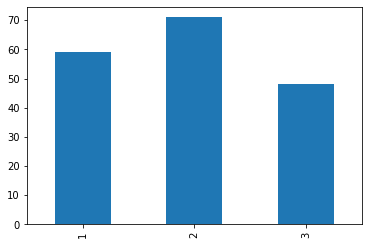

In [ ]:
import requests
from fastai.tabular import * 
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
with open("./wine.data", "wb") as data_file:
    response = requests.get(url)
    data_file = data_file.write(response.content)

attributes = [
    "category",
    "Alcohol",
    "Malic_acid",
    "Ash",
    "Alcalinity_of_ash",
    "Magnesium",
    "Total_phenols",
    "Flavanoids",
    "Nonflavanoid_phenols",
    "Proanthocyanins",
    "Color_intensity",
    "Hue",
    "OD280_OD315_of_diluted_wines",
    "Proline"
]

df = pd.read_csv("wine.data", header=None, names=attributes)

df['category'].value_counts().sort_index().plot.bar()

In [ ]:
df.head()

,category,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.describe()

,category,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Sprawdzanie braków

In [ ]:
df[df.isnull().any(1)]

,category,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline


# Podział danych

In [ ]:
valid_count = int(len(df) * 0.25)

df = df.sample(frac=1).reset_index(drop=True)

valid_idx = range(len(df) - valid_count, len(df))

# Preprocesing

In [ ]:
preprocessing_steps = [Normalize] # normalizacja

target_var = 'category'

data = TabularDataBunch.from_df(".", df, target_var, valid_idx=valid_idx, procs=preprocessing_steps)

# Uczenie

Tworzymy obiekt TabularLearner na naszych danych. Będzie to sieć neuronowa o 2 warstwach, 200 neuronach w pierwszej i 100 w drugiej warstwie. 

Jak wspominaliśmy, metryką będzie skuteczność, czyli accuracy

In [ ]:
learn = tabular_learner(data, layers=[300,150], metrics=accuracy)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.095517,0.562858,0.909091,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


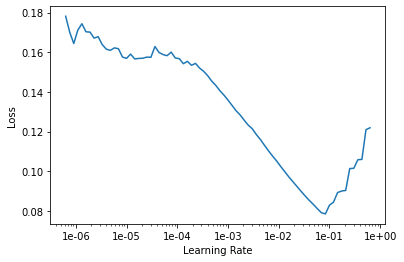

In [ ]:
learn.lr_find()
learn.recorder.plot()

# Walidacja

In [ ]:
learn.validate()
learn.validate(learn.data.valid_dl)

[0.562858, tensor(0.9091)]

# Predykcje 

In [ ]:
preds, _ = learn.get_preds(data.valid_ds)
pred_prob, pred_class = preds.max(1)
pred_prob, pred_class

(tensor([0.6564, 0.6677, 0.8273, 0.7259, 0.5422, 0.5703, 0.6204, 0.5135, 0.5599,
         0.4613, 0.4261, 0.6687, 0.5595, 0.4999, 0.6858, 0.4272, 0.6757, 0.6312,
         0.6541, 0.6325, 0.4158, 0.6594, 0.6694, 0.4726, 0.5689, 0.5455, 0.4278,
         0.5863, 0.3882, 0.6633, 0.6667, 0.5685, 0.5206, 0.7834, 0.5752, 0.5959,
         0.4677, 0.7154, 0.4963, 0.8168, 0.6676, 0.6586, 0.6982, 0.7293, 0.5755,
         0.5194, 0.5919, 0.9037, 0.6745, 0.6234, 0.6199, 0.6662, 0.5271, 0.8281,
         0.5652, 0.5076, 0.6179, 0.4882, 0.5016, 0.6814, 0.5549, 0.6546, 0.3946,
         0.5852, 0.5698, 0.6396, 0.5893, 0.6197, 0.6601, 0.4390, 0.6328, 0.5763,
         0.4852, 0.5412, 0.6557, 0.5534, 0.7237, 0.7402, 0.5272, 0.5993, 0.6459,
         0.5993, 0.6368, 0.4469, 0.6863, 0.4832, 0.6575, 0.4862, 0.6608, 0.6787,
         0.7393, 0.3752, 0.5592, 0.5519, 0.6891, 0.5458, 0.5389, 0.6078, 0.6118,
         0.5620, 0.7252, 0.4596, 0.4968, 0.7248, 0.5679, 0.5805, 0.4235, 0.7852,
         0.8865, 0.5458, 0.8